In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Sample dataset

In [37]:
df = pd.read_csv("Phone_Dataset.csv")
df

,RAM(GB),ROM(GB),Display(inches),Price($)
0,8,64,5.4,500
1,4,512,5.9,500
2,12,64,6.8,200
3,6,32,5.6,600
4,4,512,6.6,700
5,12,32,5.4,600
6,6,512,6.5,250
7,8,32,5.6,250
8,12,512,5.4,150
9,16,512,5.9,300


In [38]:
df.rename(columns={"RAM(GB)": "ram"}, inplace=True)
df.rename(columns={"ROM(GB)": "rom"}, inplace=True)
df.rename(columns={"Display(inches)": "display"}, inplace=True)
df.rename(columns={"Price($)": "price"}, inplace=True)

Separate features and target

In [39]:
X = df[["ram", "rom", "display"]]
y = df["price"]

Split data into training and test sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the features for faster convergence

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train a model using SGDRegressor

In [42]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, learning_rate="constant", random_state=42)
sgd_regressor.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='constant', random_state=42)

Coefficients

In [43]:
sgd_regressor.coef_

array([ -0.28328654, -43.48144299,  15.0499784 ])

Intercept

In [44]:
sgd_regressor.intercept_

array([479.22570782])

Make predictions on the test set

In [45]:
y_pred = sgd_regressor.predict(X_test_scaled)

Evaluate the model

In [48]:
mse = mean_squared_error(y_test, y_pred)
mse

98028.3187898072

Plot actual vs predicted prices

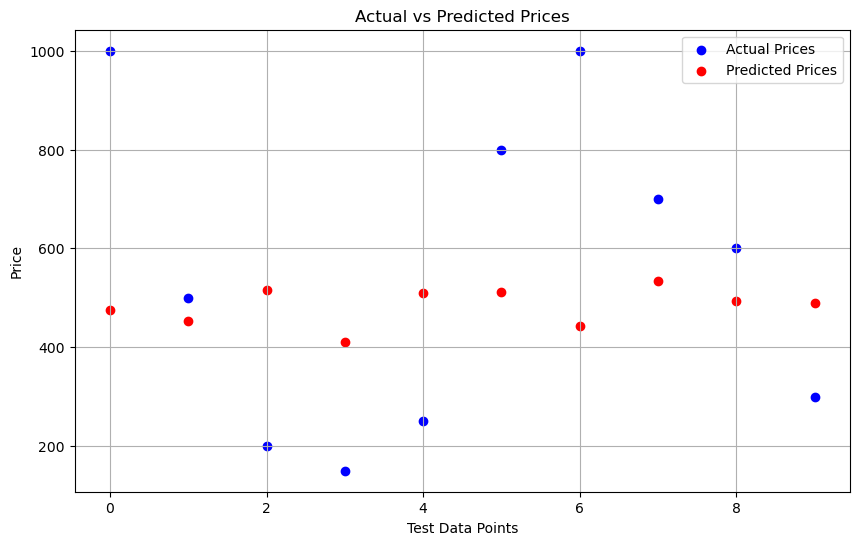

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual Prices")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Plot learning curve (cost over iterations)

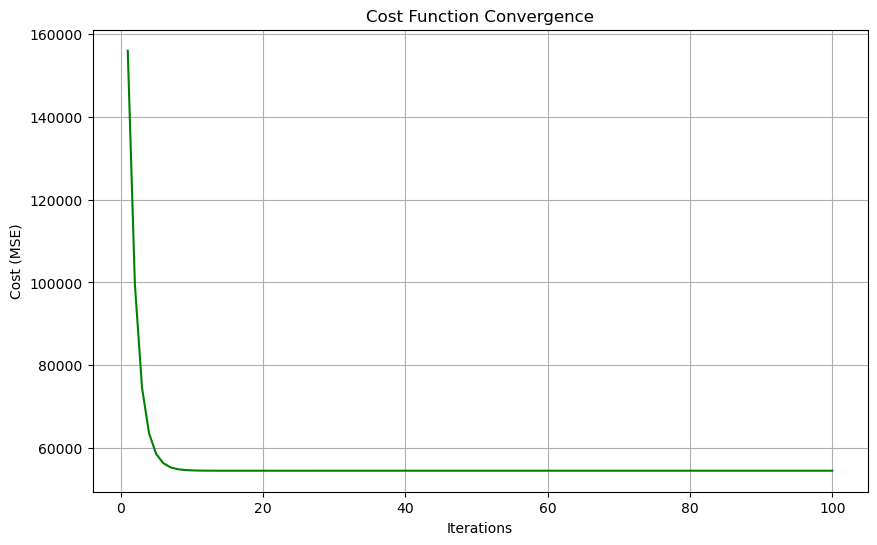

In [49]:
cost_history = []
sgd_regressor = SGDRegressor(max_iter=1, tol=None, eta0=0.01, learning_rate="constant", random_state=42, warm_start=True)
for i in range(100):
    sgd_regressor.fit(X_train_scaled, y_train)
    y_train_pred = sgd_regressor.predict(X_train_scaled)
    cost = mean_squared_error(y_train, y_train_pred)
    cost_history.append(cost)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), cost_history, color="green")
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

In [50]:
cost_history

[155974.9030672724,
 99626.46326393072,
 74615.4440346368,
 63497.64865543575,
 58545.6874891608,
 56333.98454450797,
 55342.47812806355,
 54895.75253572308,
 54693.14224552214,
 54600.46174651891,
 54557.6133258879,
 54537.55083494484,
 54528.02288219224,
 54523.431577600866,
 54521.19034173223,
 54520.087163086384,
 54519.5445326169,
 54519.28202041788,
 54519.16072557673,
 54519.110542345865,
 54519.095545339296,
 54519.09716834675,
 54519.10583713641,
 54519.116705278015,
 54519.12743024032,
 54519.136990680476,
 54519.14504884946,
 54519.15160502873,
 54519.1568112808,
 54519.16087310866,
 54519.16399976603,
 54519.16638129166,
 54519.16817991309,
 54519.16952885654,
 54519.17053467435,
 54519.17128096493,
 54519.171832370535,
 54519.17223830987,
 54519.17253621986,
 54519.17275424948,
 54519.172913432776,
 54519.17302940509,
 54519.173113737,
 54519.17317495813,
 54519.17321933558,
 54519.17325146064,
 54519.17327468842,
 54519.17329146517,
 54519.173303570926,
 54519.1733122987,